# Predict

In [1]:
import pandas as pd
from katlas.train import *
from katlas.dnn import *
from fastai.vision.all import *
from katlas.pssm import *

In [2]:
cddm_unk = pd.read_parquet('out/kd_similar_cddm.parquet')
cddm_unk = cddm_unk[cddm_unk.within_threshold].copy()

In [3]:
cddm_t5 = pd.read_parquet('train/cddm_t5.parquet')

In [4]:
cddm_t5

,-20P,-19P,-18P,-17P,-16P,-15P,-14P,-13P,-12P,-11P,...,T5_1014,T5_1015,T5_1016,T5_1017,T5_1018,T5_1019,T5_1020,T5_1021,T5_1022,T5_1023
index,,,,,,,,,,,,,,,,,,,,,
P12931_SRC_HUMAN_KD1,0.054538,0.048428,0.054968,0.050526,0.045837,0.046599,0.060746,0.060644,0.056785,0.055857,...,-0.029892,-0.003851,-0.046692,-0.028458,0.045105,-0.029617,-0.027618,0.011269,-0.016449,-0.025482
P29320_EPHA3_HUMAN_KD1,0.044276,0.047875,0.047696,0.043803,0.046425,0.052716,0.053135,0.055231,0.040762,0.047015,...,-0.027512,-0.005188,-0.077637,0.002682,0.064209,-0.064514,-0.008598,0.026535,-0.037079,-0.015259
P07332_FES_HUMAN_KD1,0.047231,0.045455,0.049569,0.049919,0.040729,0.047568,0.054400,0.056503,0.051623,0.043039,...,-0.005474,-0.013451,-0.029602,-0.024857,0.021637,-0.034576,-0.022964,-0.001378,-0.011261,-0.023193
Q16288_NTRK3_HUMAN_KD1,0.044444,0.049404,0.046433,0.049689,0.041150,0.045557,0.049972,0.048603,0.045682,0.043382,...,-0.005585,-0.014786,-0.040314,-0.037933,0.066162,-0.023819,-0.032288,0.012024,-0.028931,-0.015007
Q9UM73_ALK_HUMAN_KD1,0.045748,0.044418,0.053976,0.046821,0.047921,0.051208,0.055587,0.056128,0.043950,0.045610,...,-0.011032,-0.003567,-0.054169,-0.018936,0.078918,-0.038788,-0.020508,0.002199,-0.035187,-0.010475
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Q15746_MYLK_HUMAN_KD1,0.078947,0.100000,0.047619,0.093023,0.069767,0.046512,0.136364,0.044444,0.044444,0.086957,...,-0.045715,-0.031281,-0.023895,-0.017593,0.056549,-0.029312,-0.033875,-0.003410,-0.010529,-0.009941
Q01973_ROR1_HUMAN_KD1,0.097561,0.024390,0.024390,0.219512,0.024390,0.000000,0.073171,0.071429,0.047619,0.190476,...,0.012825,-0.011787,-0.033295,-0.045105,0.103088,0.009338,0.001254,0.006546,0.001157,-0.024689
O14976_GAK_HUMAN_KD1,0.075000,0.200000,0.000000,0.073171,0.048780,0.024390,0.073171,0.073171,0.024390,0.097561,...,-0.039459,-0.031219,-0.009491,-0.019928,0.039917,-0.033051,-0.032440,-0.010689,-0.023773,-0.017456


In [5]:
cddm_unk = pd.read_parquet('out/kd_similar_cddm.parquet')
cddm_unk = cddm_unk[cddm_unk.within_threshold].copy()

In [6]:
len(cddm_unk),len(cddm_unk)

(1204, 1204)

In [7]:
cddm_unk

,closest_pos_index,closest_dist,within_threshold
index,,,
A0A8I3S724_AURKA_CANLF_KD1,O14965_AURKA_HUMAN_KD1,0.088972,True
A0A8I5ZNK2_OXSR1_RAT_KD1,O95747_OXSR1_HUMAN_KD1,0.029746,True
A0JM20_TYRO3_XENTR_KD1,Q06418_TYRO3_HUMAN_KD1,0.158522,True
A0JNB0_FYN_BOVIN_KD1,P06241_FYN_HUMAN_KD1,0.019767,True
A0M8R7_MET_PAPAN_KD1,P08581_MET_HUMAN_KD1,0.000000,True
...,...,...,...
Q9Z2B9_KS6A4_MOUSE_KD1,O75676_KS6A4_HUMAN_KD1,0.059483,True
Q9Z2G7_GRK7_ICTTR_KD1,Q8WTQ7_GRK7_HUMAN_KD1,0.102998,True
Q9Z2R9_E2AK1_MOUSE_KD1,Q9BQI3_E2AK1_HUMAN_KD1,0.145594,True


In [8]:
t5 = pd.read_parquet('out/uniprot_kd_t5.parquet')

In [9]:
from katlas.plot import *

In [10]:
info = pd.DataFrame(t5.index)

In [11]:
info['CDDM_predicted'] = info.kd_ID.isin(cddm_unk.index).astype(int)
info['CDDM_known'] = info.kd_ID.isin(cddm_t5.index).replace({True:2,False:0})

/tmp/ipykernel_865965/2171701244.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  info['CDDM_known'] = info.kd_ID.isin(cddm_t5.index).replace({True:2,False:0})


In [12]:
info['CDDM'] = (info.CDDM_predicted+info.CDDM_known).replace({0:'unknown',1:'predicted',2:'CDDM known'})

In [13]:
info.CDDM.value_counts()

CDDM
unknown       4011
predicted     1204
CDDM known     321
Name: count, dtype: int64

In [14]:
info = info.set_index('kd_ID')

In [16]:
set_sns()

/home/sky1ove/git/KATLAS/katlas/.venv/lib/python3.12/site-packages/logomaker/../umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


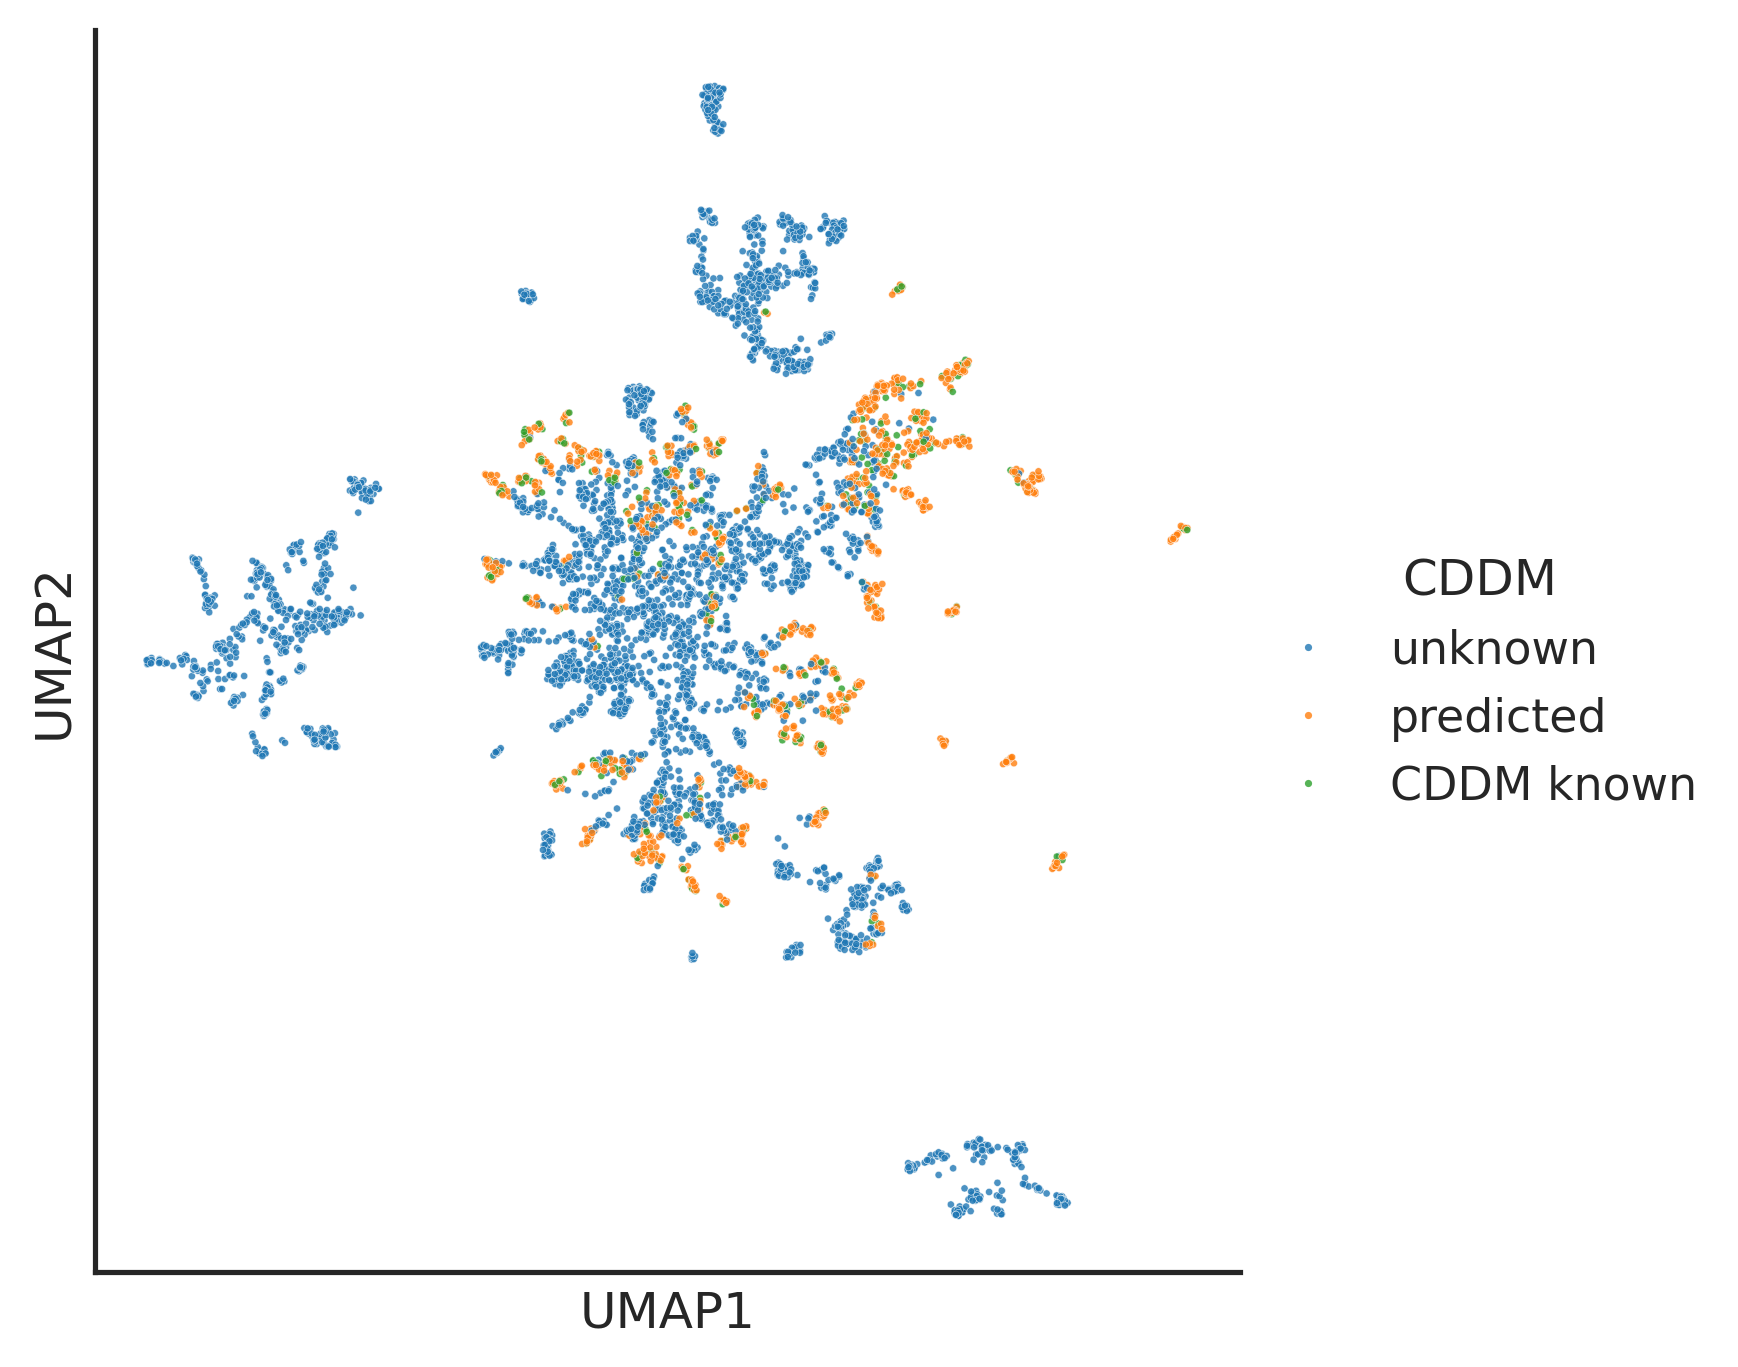

In [17]:
plot_cluster(t5,method='umap',complexity=30,s=3,hue=info.CDDM,legend=True,palette='tab10',min_dist=0.6)
save_svg('fig/umap_cddm_unknown.svg')

## Combine both

In [19]:
pspa_info = pd.read_parquet('raw/pspa_unk.parquet')

In [22]:
info['both_known'] = pspa_info.PSPA_known|info.CDDM_known

In [32]:
info['both_known'].value_counts()

both_known
0    5152
2     384
Name: count, dtype: int64

In [29]:
info['both_predicted'] = pspa_info.PSPA_predicted |info.CDDM_predicted 

In [30]:
info['both_predicted'].value_counts()

both_predicted
0    4242
1    1294
Name: count, dtype: int64

In [37]:
info['both'] = (info.both_predicted+info.both_known).replace({0:'unknown',1:'predicted',2:'known',3:'known'})

In [38]:
info

,CDDM_predicted,CDDM_known,CDDM,both_known,both_predicted,both
kd_ID,,,,,,
A0A075F7E9_LERK1_ORYSI_KD1,0,0,unknown,0,0,unknown
A0A078BQP2_GCY25_CAEEL_KD1,0,0,unknown,0,0,unknown
A0A078CGE6_M3KE1_BRANA_KD1,0,0,unknown,0,0,unknown
A0A0G2K344_PK3CA_RAT_KD1,0,0,unknown,0,0,unknown
A0A0H2ZM62_HK06_STRP2_KD1,0,0,unknown,0,0,unknown
...,...,...,...,...,...,...
W0LYS5_CAMKI_MACNP_KD1,1,0,predicted,0,1,predicted
W0T9X4_ATG1_KLUMD_KD1,0,0,unknown,0,0,unknown
W7JX98_KGP_PLAFO_KD1,0,0,unknown,0,0,unknown


In [39]:
info.both.value_counts()

both
unknown      3881
predicted    1271
known         384
Name: count, dtype: int64

/home/sky1ove/git/KATLAS/katlas/.venv/lib/python3.12/site-packages/logomaker/../umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


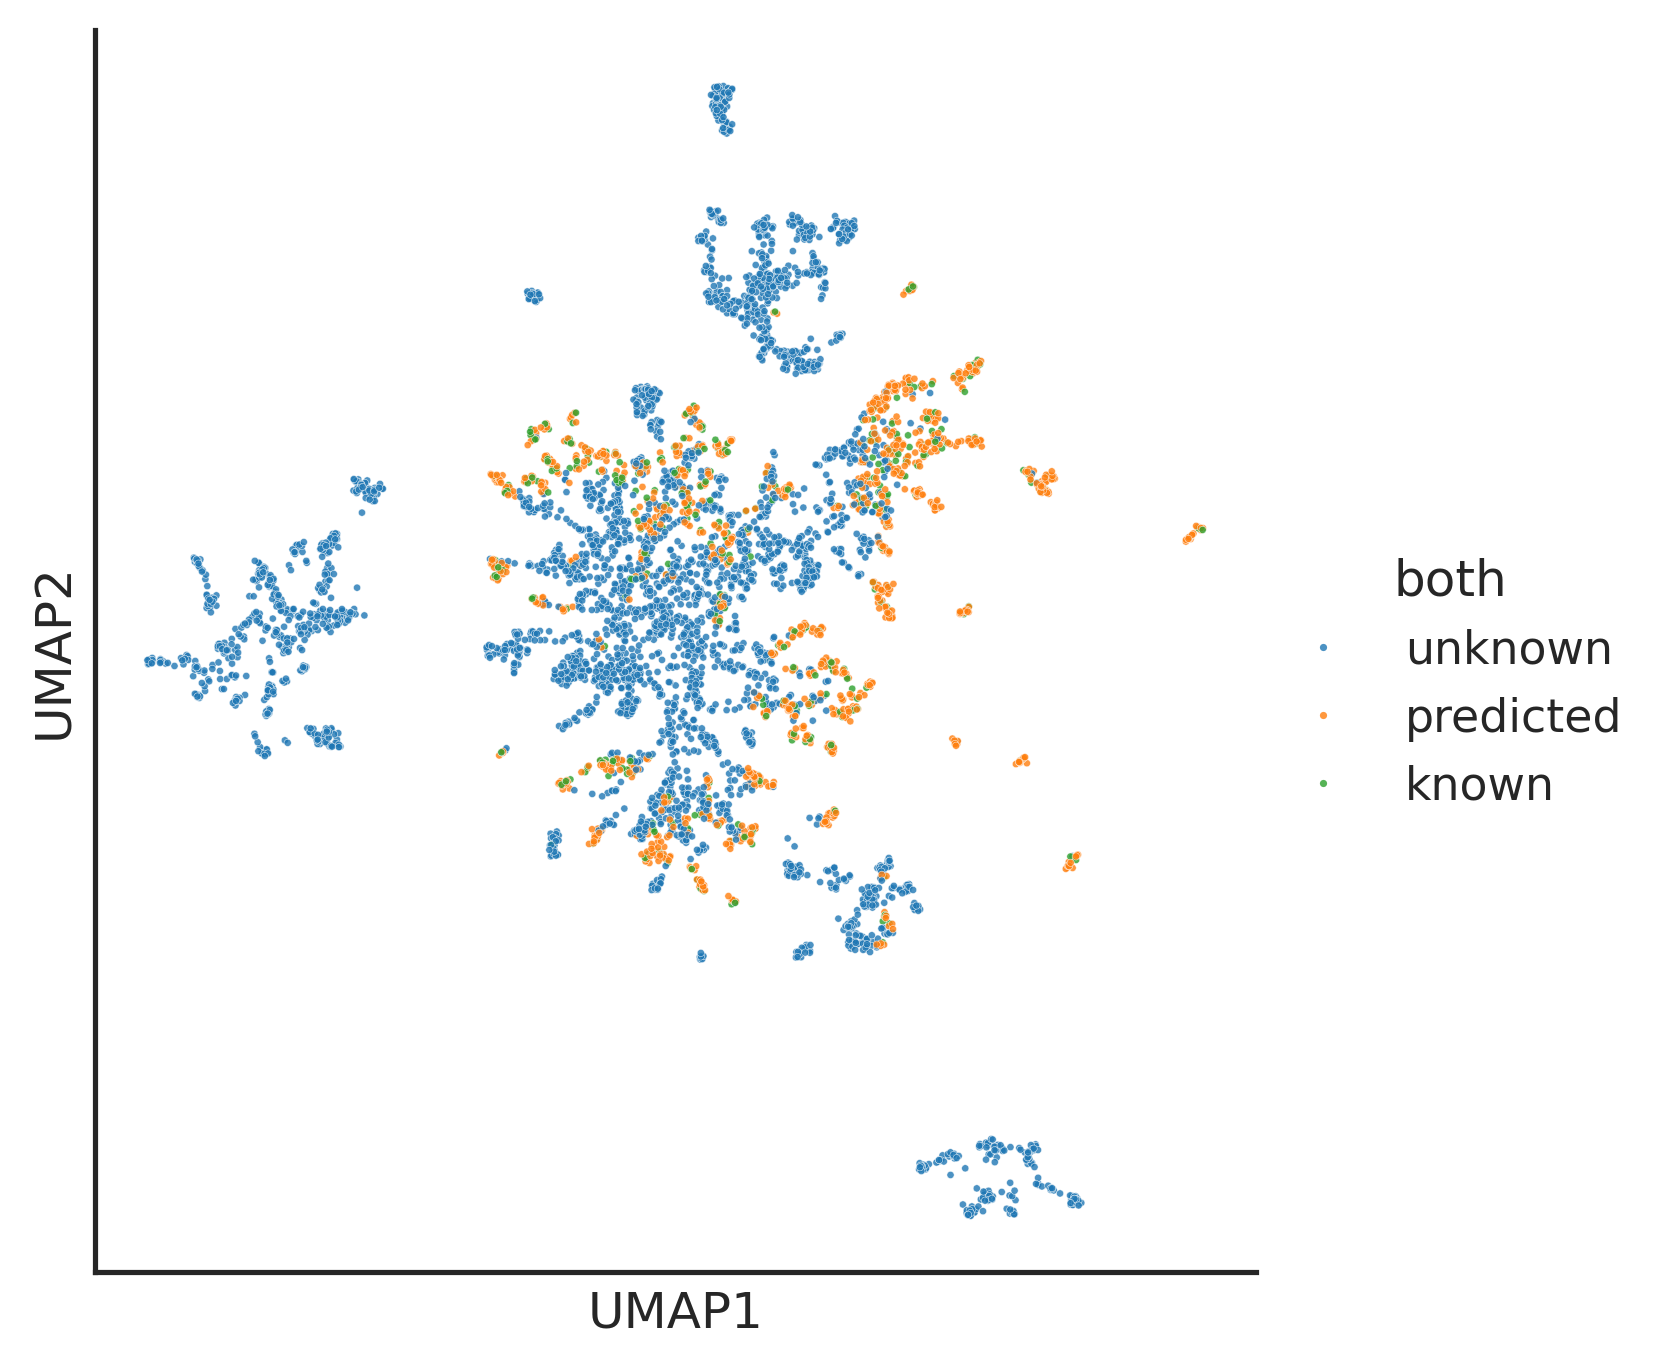

In [40]:
plot_cluster(t5,method='umap',complexity=30,s=3,hue=info.both,legend=True,palette='tab10',min_dist=0.6)
save_svg('fig/umap_both_unknown.svg')